In [1]:
#%% Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

In [2]:
#%% CONSTANTS
N_SAMP = 10000
BINS = 30

# PDFs of normal distributions with different parameters
Too high or too low $\sigma$ parameter can make histogram hardly informative (especially when using 'density') option. Changing scale of x-axis is one option to fight it but it distorts proportions between distributions with different parameters.

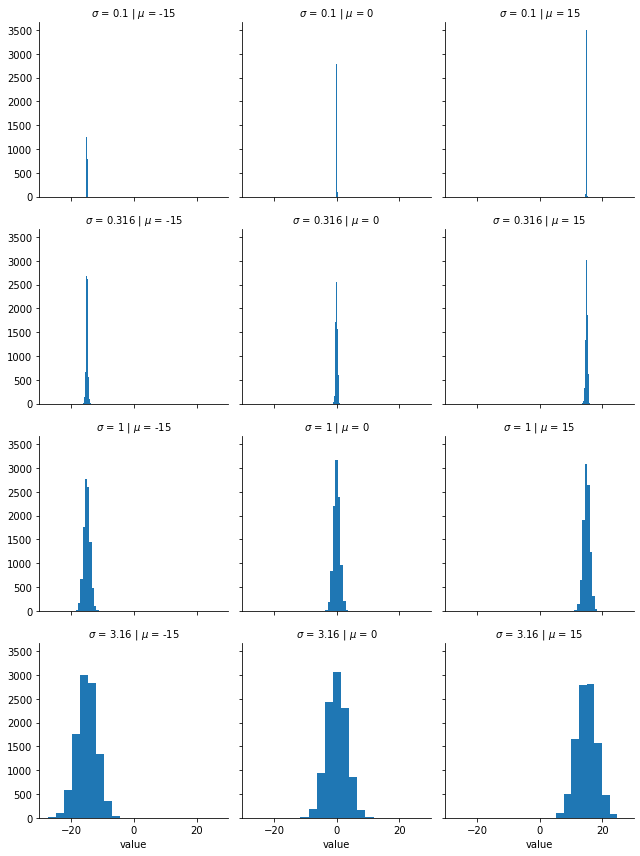

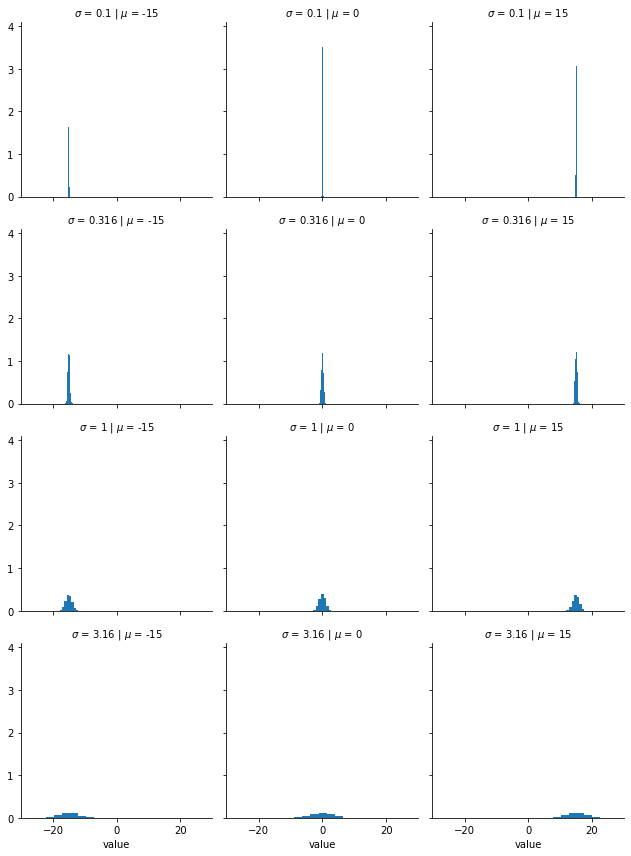

In [3]:
df = pd.DataFrame()

mu = [-15, 0, 15]
sigma = [0.1, 0.316, 1, 3.16]

for _mu in mu:
    for _sigma in sigma:
        df.loc[:,r'{},{}'.format(_mu, _sigma)] = \
        np.random.normal(loc=_mu, scale=_sigma, size=N_SAMP)
        
melted = pd.melt(df)

temp = melted.loc[:,'variable'].str.split(',', expand=True)
melted.loc[:,r'$\mu$'] = temp[0]
melted.loc[:,r'$\sigma$'] = temp[1]
del temp
melted.drop(columns=['variable'])

f = sns.FacetGrid(melted, col=r'$\mu$', row=r'$\sigma$')
f = f.map(plt.hist, 'value')

f = sns.FacetGrid(melted, col=r'$\mu$', row=r'$\sigma$')
f = f.map(plt.hist, 'value', density=True)

# Changing bin size for histiogram

Higher bin sizes give better view on shape of PDS's shape

In [4]:
bins = (np.round(np.logspace(0, 1, 5)*5)).astype(int)
bins

array([ 5,  9, 16, 28, 50])

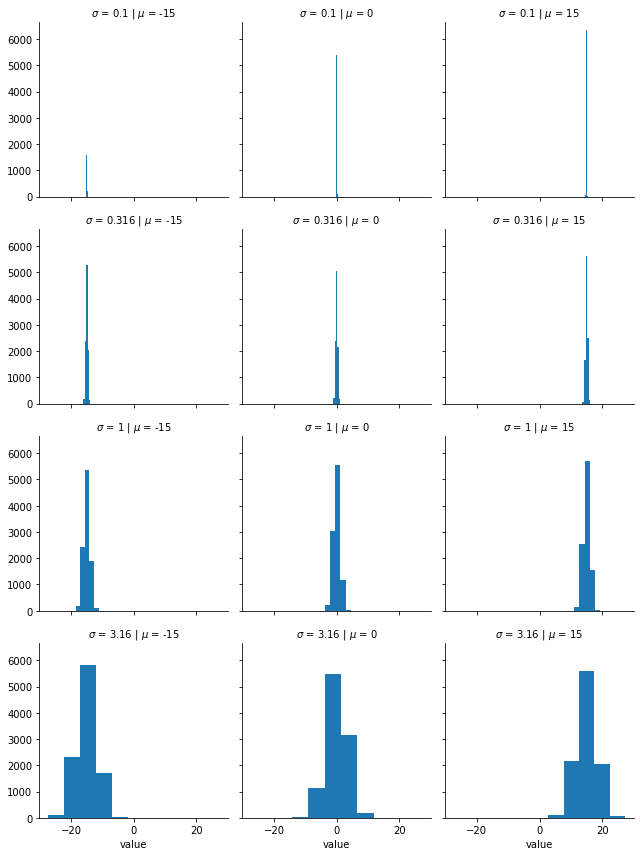

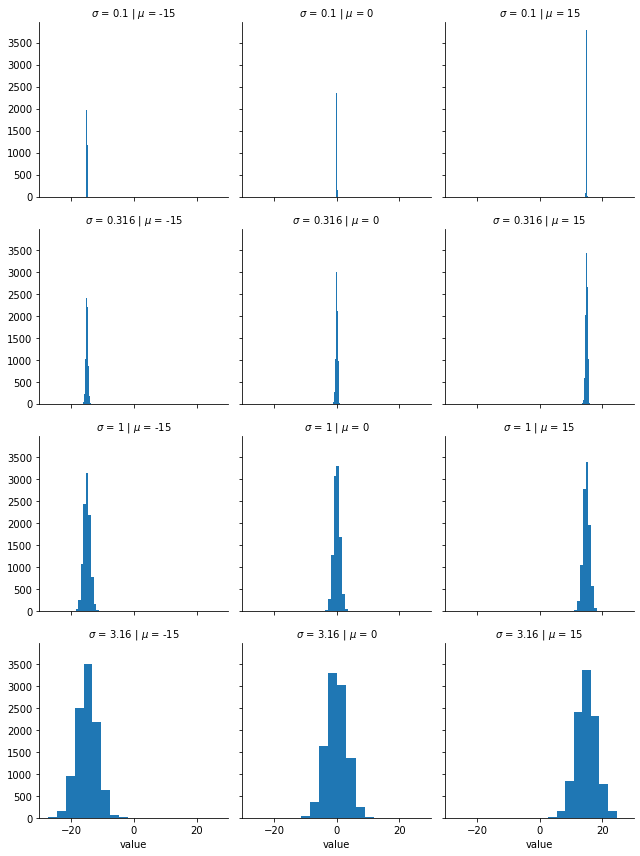

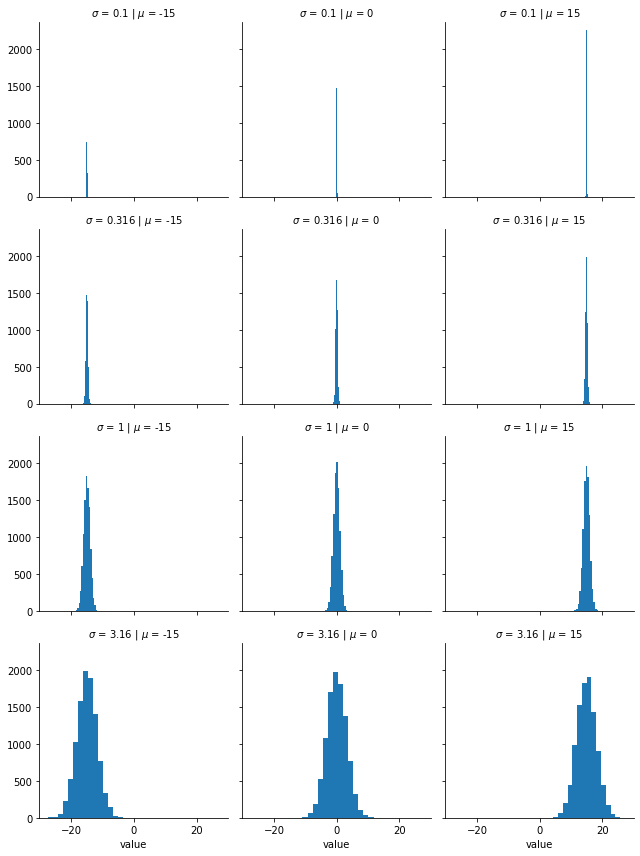

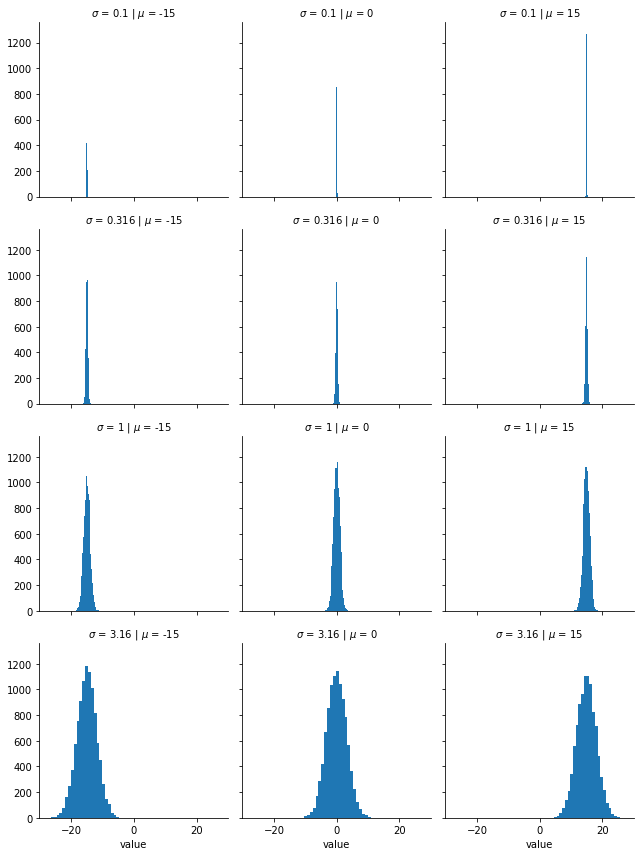

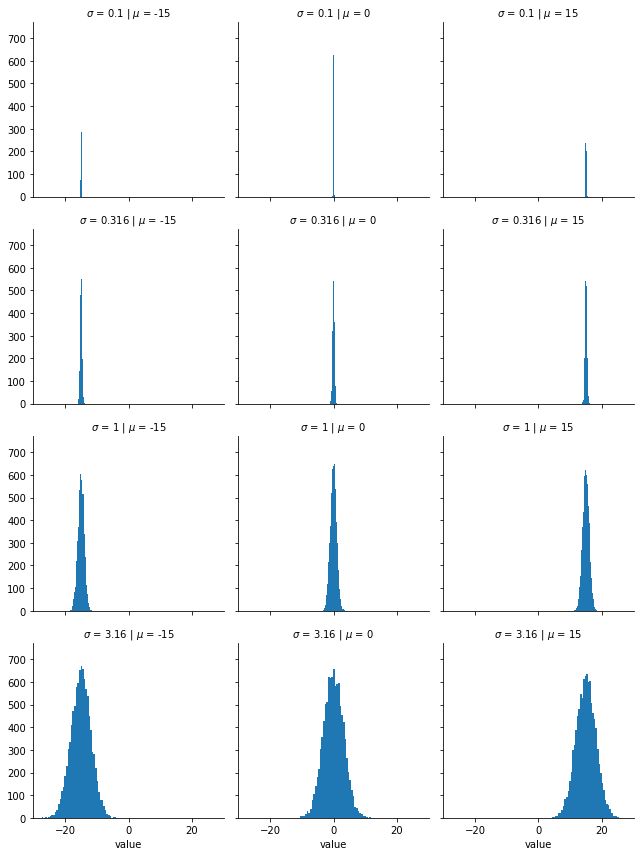

In [5]:
for b in bins:
    f = sns.FacetGrid(melted, col='$\mu$', row='$\sigma$')
    f = f.map(plt.hist, 'value', bins = b )
       

# CDF for normal distrubution

In polish "Dystrybuanta". 

When:

$p(x)$ - is a PDF

Then:

$P(x)=\int_{-\infty}^{x}p(u)du$ - is it's CDF

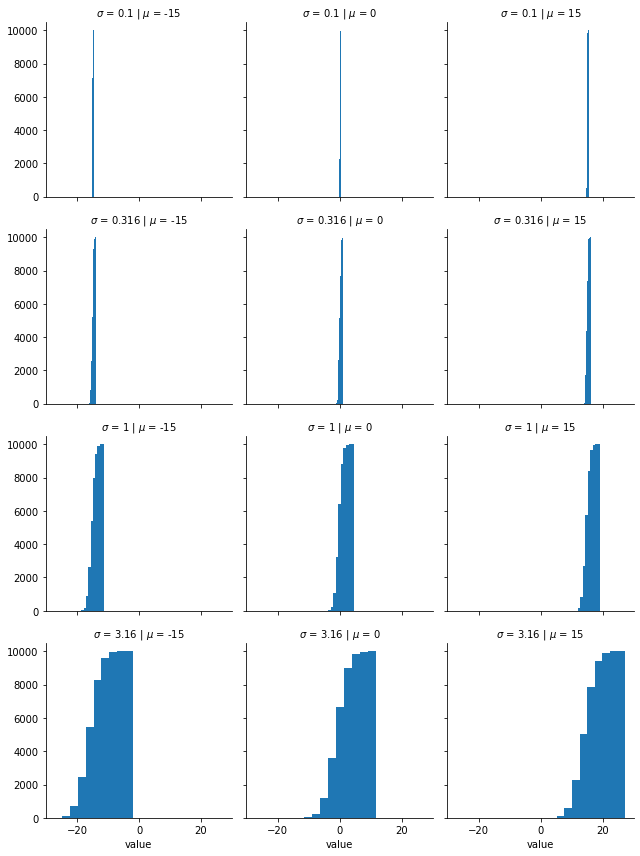

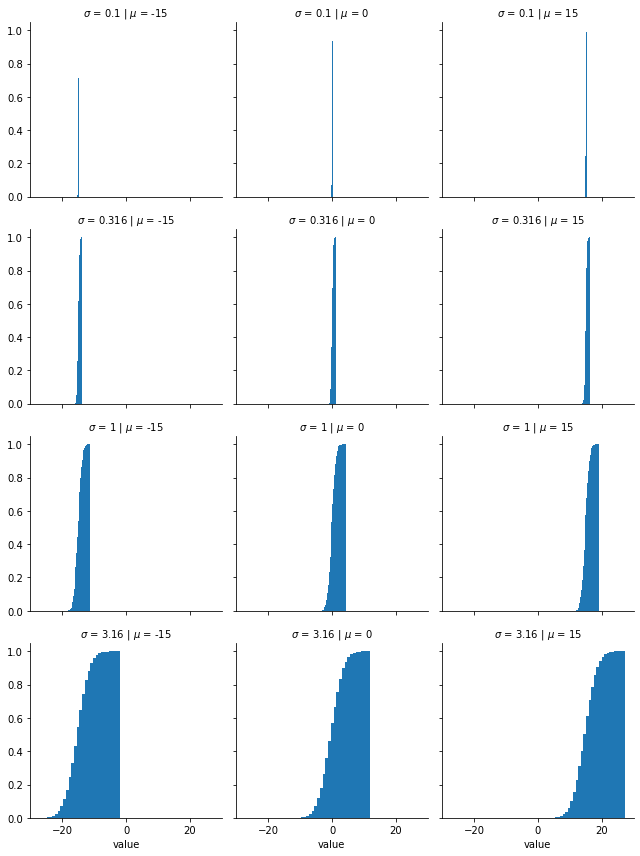

In [6]:
f = sns.FacetGrid(melted, col=r'$\mu$', row=r'$\sigma$')
f = f.map(plt.hist, 'value', cumulative=True)
f = sns.FacetGrid(melted, col='$\mu$', row='$\sigma$')
f = f.map(plt.hist, 'value', density = True, cumulative=True, bins=BINS)
 

# Inverse LOGIT usage

Logit function trnasforms a $(0; 1)$ interval into $(-\infty; +\infty)$

Inverse logit function trnasforms a $(-\infty; +\infty)$ interval into $(0; 1)$ 

It helps when PDFs are spread widely, by cumulating them in $(0; 1)$ interval. Also it affects negatively PDFs that aren't centered around 0

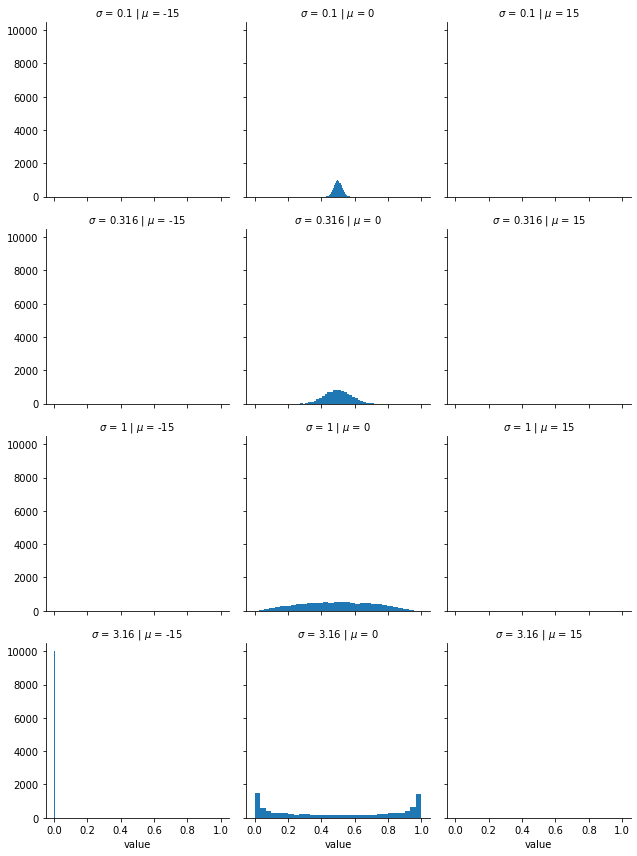

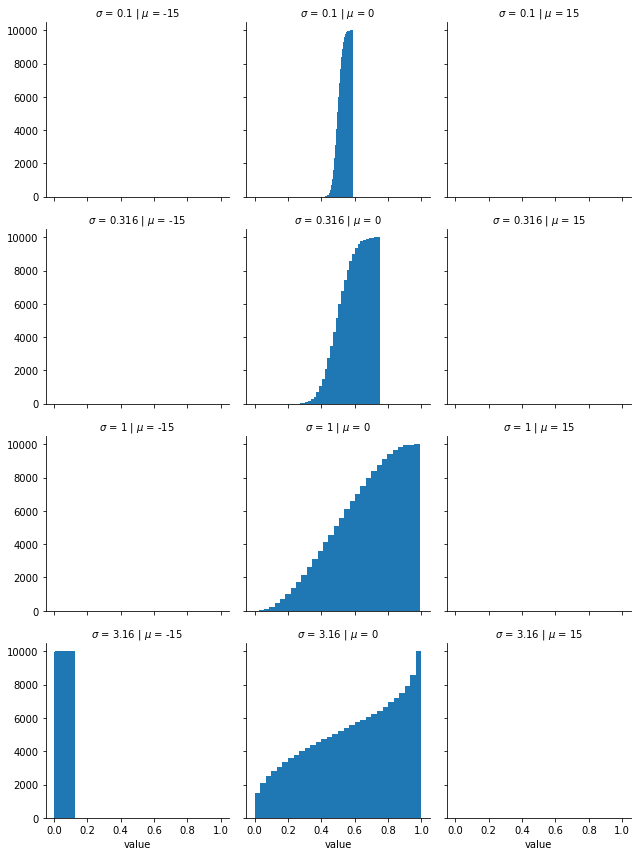

In [7]:
melted_logit = melted.copy()
melted_logit.loc[:,'value'] = sp.special.expit(melted_logit.loc[:,'value'])


f = sns.FacetGrid(melted_logit, col=r'$\mu$', row=r'$\sigma$')
f = f.map(plt.hist, 'value', bins=BINS)


f = sns.FacetGrid(melted_logit, col=r'$\mu$', row=r'$\sigma$')
f = f.map(plt.hist, 'value', cumulative=True, bins=BINS)

# Poisson's Distribution

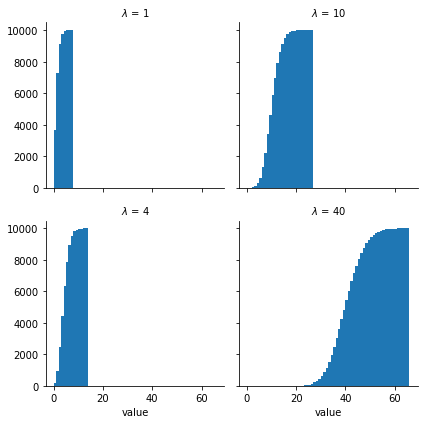

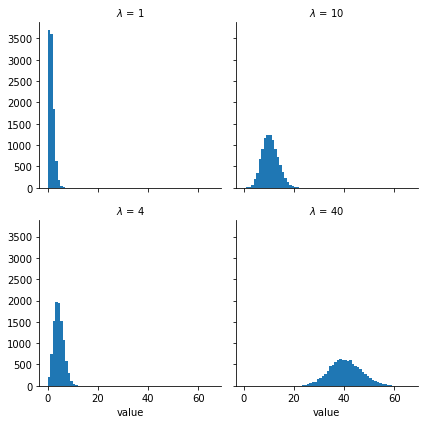

In [8]:
df_p = pd.DataFrame()

lam = [1, 4, 10, 40]
bins = [3, 4, 10, 40]
b = [] 

def natural_hist(x, naturalBins=True, **kwargs):
    if naturalBins:
        bins = np.linspace(x.min(), x.max()+1, ((x.max()-x.min())+2) )
    else:
        bins = None
    plt.hist(x, bins=bins, **kwargs)

for _lam in lam:   
    df_p.loc[:,'{}'.format(_lam)] = np.random.poisson(lam=_lam, size=N_SAMP)
    
melted_poisson = df_p.melt()

melted_poisson.rename(columns={'variable': r'$\lambda$'}, inplace=True)

f = sns.FacetGrid(melted_poisson, col=r'$\lambda$', col_wrap=2)
f = f.map(natural_hist, 'value', cumulative=True)
    
f = sns.FacetGrid(melted_poisson, col=r'$\lambda$', col_wrap=2)
f = f.map(natural_hist, 'value')

# Beta distribution

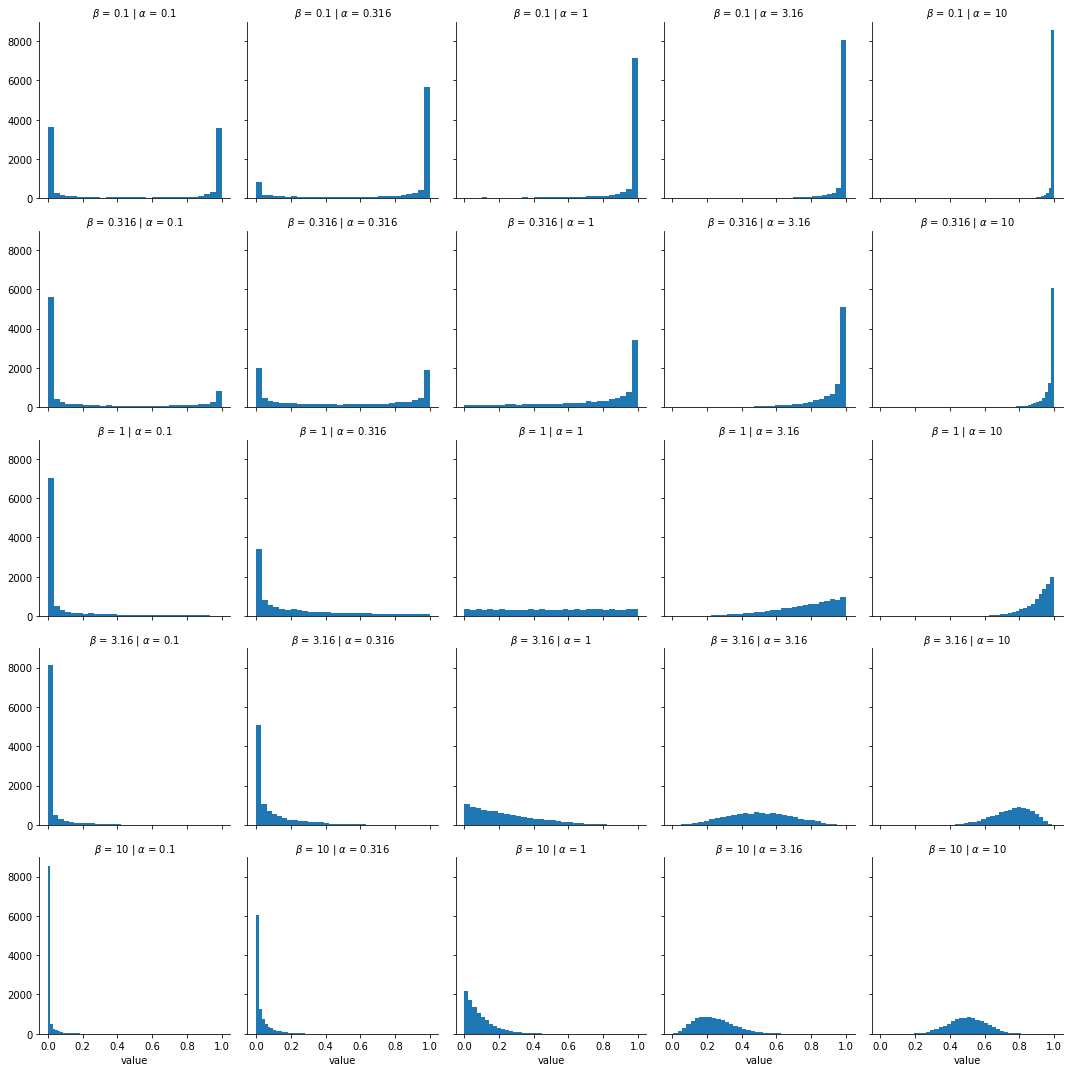

In [9]:
df_ab = pd.DataFrame()

alpha = [0.1, 0.316, 1, 3.16, 10]
beta = [0.1, 0.316, 1, 3.16, 10]

for _alpha in alpha:
    for _beta in beta:
        df_ab.loc[:,r'{},{}'.format(_alpha, _beta)] = \
        np.random.beta(a=_alpha, b=_beta, size=N_SAMP)

melted_ab = df_ab.melt()

temp = melted_ab.loc[:,'variable'].str.split(',', expand=True)
melted_ab.loc[:,r'$\alpha$'] = temp[0]
melted_ab.loc[:,r'$\beta$'] = temp[1]
del temp
melted_ab.drop(columns=['variable'])

f = sns.FacetGrid(melted_ab,\
                  col=r'$\alpha$', col_order=list(str(i) for i in alpha), \
                  row=r'$\beta$', row_order=list(str(i) for i in beta) )
f = f.map(plt.hist, 'value', bins=30)

# Mean-Population parametrization

$\alpha = \mu\cdot N$

$\beta = N-\alpha$

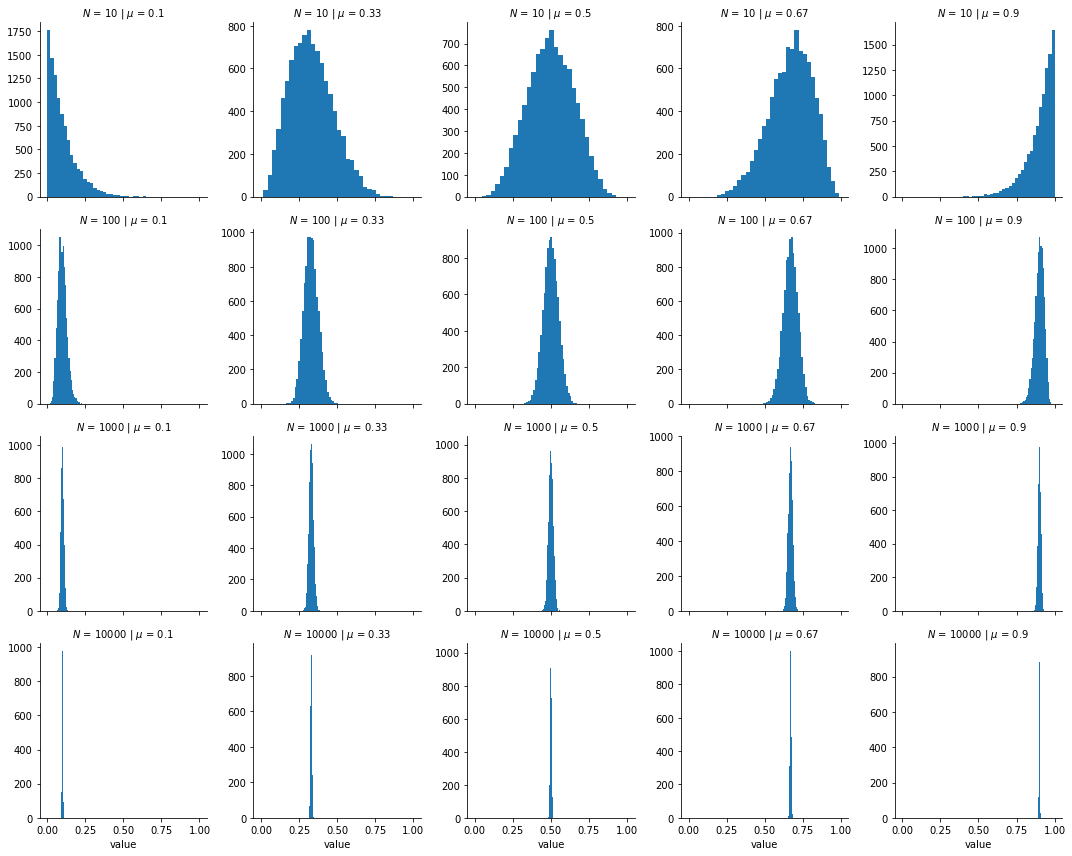

In [10]:
df_mp = pd.DataFrame()

mean = [0.1, 0.33, 0.5, 0.67, 0.9] # \in (0; 1) 
population = [10, 100, 1000, 10000] # \in (0; \inf)

for _mu in mean:
    for _N in population:
        a = _mu*_N
        b = _N - a
        df_mp.loc[:,r'{},{}'.format(_mu, _N)] = \
        np.random.beta(a=a, b=b, size=N_SAMP)

melted_mp = df_mp.melt()

temp = melted_mp.loc[:,'variable'].str.split(',', expand=True)
melted_mp.loc[:,r'$\mu$'] = temp[0]
melted_mp.loc[:,r'$N$'] = temp[1]
del temp
melted_mp.drop(columns=['variable'])

f = sns.FacetGrid(melted_mp, sharey=False,\
                  col=r'$\mu$', col_order=list(str(i) for i in mean),\
                  row=r'$N$', row_order=list(str(i) for i in population))
f = f.map(plt.hist, 'value', bins=BINS)

# Location-Dispersion parametrization

$\alpha = \frac{1-\psi}{\psi}\cdot\mu$

$\beta = \frac{1-\psi}{\psi}\cdot(1-\mu)$

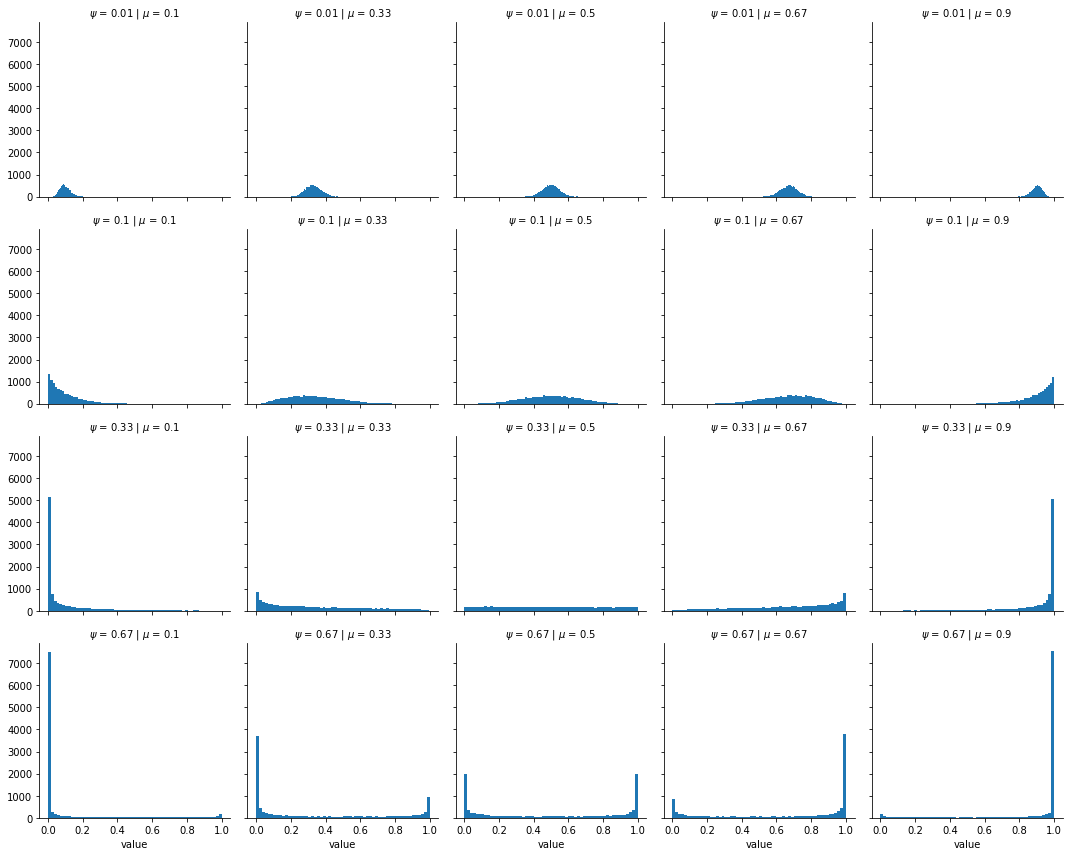

In [11]:
df_ld = pd.DataFrame()

mean = [0.1, 0.33, 0.5, 0.67, 0.9] # \in (0; 1) 
dispersion = [0.01, 0.1, 0.33, 0.67] # \in (0; 1)

for _mu in mean:
    for _psi in dispersion:
        a = (1-_psi)/_psi*_mu
        b = (1-_psi)/_psi*(1-_mu)
        df_ld.loc[:,r'{},{}'.format(_mu, _psi)] = \
        np.random.beta(a=a, b=b, size=N_SAMP)

melted_ld = df_ld.melt()

temp = melted_ld.loc[:,'variable'].str.split(',', expand=True)
melted_ld.loc[:,r'$\mu$'] = temp[0]
melted_ld.loc[:,r'$\psi$'] = temp[1]
del temp
melted_ld.drop(columns=['variable'])

f = sns.FacetGrid(melted_ld, \
                  col=r'$\mu$', col_order=list(str(i) for i in mean), \
                  row=r'$\psi$', row_order=list(str(i) for i in dispersion))
f = f.map(plt.hist, 'value', bins=BINS*2)

# Log-normal distribution

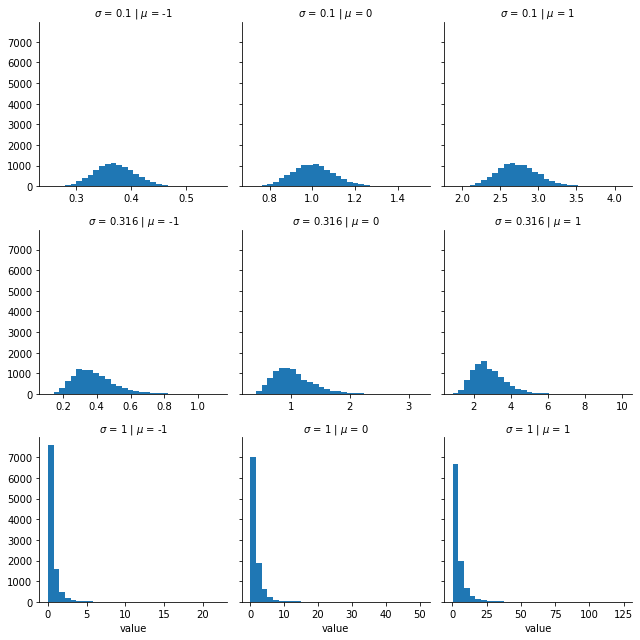

In [12]:
df_ln = pd.DataFrame()
mu = [-1, 0, 1]
sigma = [0.1, 0.316,1]

for _mu in mu:
    for _sigma in sigma:
        df_ln.loc[:,r'{},{}'.format(_mu, _sigma)] = \
        np.random.lognormal(mean=_mu, sigma=_sigma, size=N_SAMP)
        
melted_ln = df_ln.melt()

temp = melted_ln.loc[:,'variable'].str.split(',', expand=True)
melted_ln.loc[:,r'$\mu$'] = temp[0]
melted_ln.loc[:,r'$\sigma$'] = temp[1]
del temp
melted_ln.drop(columns=['variable'])

def my_hist(x, FD_Bins=True, **kwargs):
    if FD_Bins:
        h = 2*(np.percentile(x, 75)-np.percentile(x, 25))/N_SAMP**(1/3)
        b = int( np.ceil( (x.max()-x.min())/h ) )
        bins = np.linspace(x.min(), x.max()+1, b )
    else:
        bins = None
    plt.hist(x, bins=bins, **kwargs)

f = sns.FacetGrid(melted_ln, col=r'$\mu$', row=r'$\sigma$', sharex=False)
f = f.map(plt.hist, 'value', bins=BINS)